In [1]:
import pandas as pd
import numpy as np

In [2]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [3]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


###### Checando posições NCM recorrentes

Por meio do Jupyer Notebook "03_análises_diversas_e_representações_gráficas - PARTE 01", constata-se que a maior quantidade de mercadoria importada classifica-se na posição 8532. De todo modo, para fins de implementação do modelo, entende-se que é desejável não apenas um código que tenha sido importado em quantidade, mas, sobretudo, que tenha sido recorrente. Segue, portanto, consulta à posição da NCM em que os códigos NCM foram mais recorrentes.

In [4]:
# testa capítulos mais recorrentes
df["POSIÇÃO_NCM"] = df["CO_NCM"].astype(str).str[:4]

In [5]:
df["POSIÇÃO_NCM"].value_counts()

8708    51461
8536    43444
8481    36563
8483    35341
7318    34623
        ...  
4404        1
5069        1
6012        1
3019        1
5079        1
Name: POSIÇÃO_NCM, Length: 1263, dtype: int64

In [6]:
# já tendo sido analisada - em outro Jupyter Notebook - a posição 8708, segue análise da segunda posição mais recorrente, que é a 8536
df1=df[df["POSIÇÃO_NCM"]=="8536"]

In [7]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,POSIÇÃO_NCM
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405,8536
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405,8536
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405,8536
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405,8536
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713,8536
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713,8536
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713,8536
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,8536


In [8]:
df1.drop(columns="POSIÇÃO_NCM", inplace=True)

D:\ANACONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405
...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713


###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [10]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405
...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713


In [11]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-11-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [12]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [13]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_85366910,NCM_85366990,NCM_85367000,NCM_85369010,NCM_85369020,NCM_85369030,NCM_85369040,NCM_85369050,NCM_85369060,NCM_85369090
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,1,0,0,0,0,0,0,0,0


In [15]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_85366990,NCM_85367000,NCM_85369010,NCM_85369020,NCM_85369030,NCM_85369040,NCM_85369050,NCM_85369060,NCM_85369090,Un.Med.Est._11
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,1
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,0,0,1
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,1,0,0,0,0,0,0,0,0,1


In [16]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_767,Pais_776,Pais_791,Pais_820,Pais_827,Pais_831,Pais_845,Pais_858,Pais_863,Pais_888
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_URF"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_927900,UF_1010252,UF_1010852,UF_1017500,UF_1017503,UF_1017700,UF_1017701,UF_1017800,UF_1017801,UF_1017900
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_1017800,UF_1017801,UF_1017900,Modal_0,Modal_1,Modal_4,Modal_5,Modal_7,Modal_9,Modal_10
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,1,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,1,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB'])

In [20]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06',
       ...
       'UF_1017800', 'UF_1017801', 'UF_1017900', 'Modal_0', 'Modal_1',
       'Modal_4', 'Modal_5', 'Modal_7', 'Modal_9', 'Modal_10'],
      dtype='object', length=210)

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43444 entries, 25 to 1764428
Columns: 210 entries, QT_ESTAT to Modal_10
dtypes: float64(3), int64(1), uint8(206)
memory usage: 10.2 MB


In [22]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values(ascending=False)
correlacoes.head(50)

VL_FOB/QT_ESTAT    1.000000
Pais_628           0.058523
Pais_149           0.052824
NCM_85364900       0.050266
NCM_85365020       0.045688
UF_717700          0.041568
Pais_249           0.034206
UF_217801          0.033681
UF_717600          0.033394
Pais_160           0.031779
Pais_275           0.029562
NCM_85369040       0.028280
Modal_1            0.025335
NCM_85361000       0.025070
NCM_85362000       0.023879
UF_417901          0.023094
Modal_0            0.022876
NCM_85367000       0.021765
Pais_538           0.021409
UF_0               0.021329
UF_817800          0.021179
UF_117600          0.020205
Modal_4            0.020154
UF_727600          0.020010
Pais_161           0.018864
NCM_85363090       0.018830
Pais_271           0.017542
UF_317901          0.016275
NCM_85364100       0.016240
UF_317900          0.015903
Pais_383           0.015683
UF_917800          0.015550
UF_227600          0.015521
NCM_85369010       0.014782
UF_517801          0.014455
Pais_493           0

In [23]:
# Identificando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
(correlacoes[correlacoes >= 0.02]).index

Index(['VL_FOB/QT_ESTAT', 'Pais_628', 'Pais_149', 'NCM_85364900',
       'NCM_85365020', 'UF_717700', 'Pais_249', 'UF_217801', 'UF_717600',
       'Pais_160', 'Pais_275', 'NCM_85369040', 'Modal_1', 'NCM_85361000',
       'NCM_85362000', 'UF_417901', 'Modal_0', 'NCM_85367000', 'Pais_538',
       'UF_0', 'UF_817800', 'UF_117600', 'Modal_4', 'UF_727600'],
      dtype='object')

In [24]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
df2 = df_encoded[(correlacoes[correlacoes >= 0.02]).index]

In [25]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

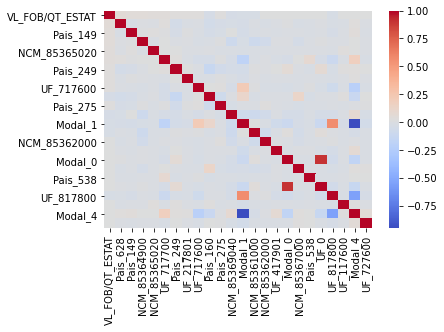

In [26]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

In [27]:
#Considerando que as Modal 1 e Modal 4 estão fortemente relacionadas, irei retirar uma delas antes da elaboração do modelo
df2=df2.drop(columns="Modal_1")

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [28]:
df2.columns

Index(['VL_FOB/QT_ESTAT', 'Pais_628', 'Pais_149', 'NCM_85364900',
       'NCM_85365020', 'UF_717700', 'Pais_249', 'UF_217801', 'UF_717600',
       'Pais_160', 'Pais_275', 'NCM_85369040', 'NCM_85361000', 'NCM_85362000',
       'UF_417901', 'Modal_0', 'NCM_85367000', 'Pais_538', 'UF_0', 'UF_817800',
       'UF_117600', 'Modal_4', 'UF_727600'],
      dtype='object')

In [29]:
x = df2[['Pais_628', 'Pais_149', 'NCM_85364900',
       'NCM_85365020', 'UF_717700', 'Pais_249', 'UF_217801', 'UF_717600',
       'Pais_160', 'Pais_275', 'NCM_85369040', 'NCM_85361000', 'NCM_85362000',
       'UF_417901', 'Modal_0', 'NCM_85367000', 'Pais_538', 'UF_0', 'UF_817800',
       'UF_117600', 'Modal_4', 'UF_727600']]
y = df2['VL_FOB/QT_ESTAT']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(x_train,y_train)

LinearRegression()

In [35]:
# impressão do intercepto
print(lm.intercept_)

35.4065037352664


In [36]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Pais_628,447.808654
Pais_149,537.914270
NCM_85364900,198.856042
NCM_85365020,1655.427062
UF_717700,167.924821
Pais_249,117.880014
UF_217801,945.322901
UF_717600,249.675388
Pais_160,-67.751859
Pais_275,172.501213


In [37]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [42]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root mean squared error - RMSE

In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [44]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [45]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

595.2097357523867

In [46]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

622.4634072702115

In [47]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

601.6618201307526

#### Mean absolute error - MAE

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

150.44844735105906

In [50]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

136.75193716063356

In [51]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

138.60345982266153

#### Mean squared error - MSE

In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

354274.62953442597

In [54]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

387460.6933904412

In [55]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

361996.9458030501

#### Coeficente de determinação - R²

In [57]:
from sklearn.metrics import r2_score

In [58]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

-0.010436372880378686

In [59]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

-0.10508725442082545

In [60]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

-0.03246140258955643